# Classifiers

## Logistic Regression

In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from exampleDatasets.utilities import *

For now, just ignore the visualize_classifier function

In [2]:
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5],
   [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

In [3]:
classifier = linear_model.LogisticRegression(C = 100)

In [4]:
classifier.fit(X, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

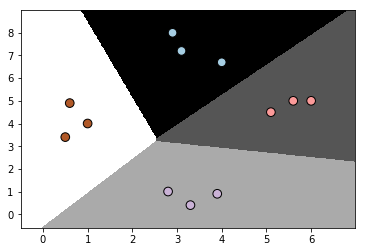

In [5]:
visualize_classifier(classifier, X, y)

## Naive Bayes Classifier

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Classifer using bayes theorem. Naive means that there is an assumption that all feautres are independent. In a 2 feature and response case, the algorithm will compute the required probabilities using a likelihood table and apply bayes theorem to get a probabiity of a feature being in that category. This idea can be extended to multiple features and responses.

$ P(A|B) = \dfrac{P(B|A) * P(A)}{P(B)}$

In [7]:
input_file = './exampleDatasets/data_multivar_nb.txt'
data = np.loadtxt(input_file, delimiter = ',')
X, y = data[:, :-1], data[:, -1]

In [8]:
 X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,
                                   test_size = 0.2, random_state = 3)

We do train_test split as well as cross validation on the dataset. This makes the model, as well as the accuracy metrics more robust.

In [9]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [10]:
y_pred = classifier.predict(X_test)

Now let's compute the accuracy and visualize the performance.

In [11]:
accuracy = 100 * (y_test == y_pred).sum() / X_test.shape[0]
print('Accuracy is {}%'.format(accuracy))

Accuracy is 100.0%


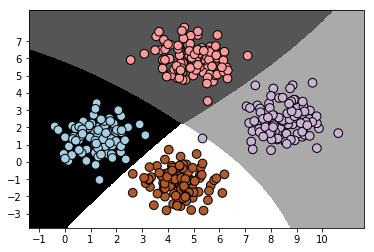

In [12]:
visualize_classifier(classifier, X, y)

In [13]:
num_folds = 3
accuracy_values = cross_validation.cross_val_score(classifier,
           X, y, scoring='accuracy', cv = num_folds)
print("Accuracy: " + str(round(100 * accuracy_values.mean(), 2)) + "%")
precision_values = cross_validation.cross_val_score(classifier,
           X, y, scoring='precision_weighted', cv = num_folds)
print("Precision: " + str(round(100 * precision_values.mean(), 2)) + "%")
recall_values = cross_validation.cross_val_score(classifier,
           X, y, scoring = 'recall_weighted', cv = num_folds)
print("Recall: " + str(round(100 * recall_values.mean(), 2)) + "%")
f1_values = cross_validation.cross_val_score(classifier,
           X, y, scoring = 'f1_weighted', cv = num_folds)
print("F1: " + str(round(100 * f1_values.mean(), 2)) + "%")

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


Note that we can also use the confusion matrix function in sklearn instead printing the metrics individually.

## Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Let's use some sample predictions and actual values.

In [15]:
true_labels = [2, 0, 0, 2, 4, 4, 1, 0, 3, 3, 3]
pred_labels = [2, 1, 0, 2, 4, 3, 1, 0, 1, 3, 3]

In [16]:
confusion_mat = confusion_matrix(true_labels, pred_labels)

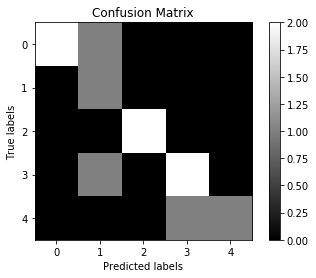

In [17]:
plt.imshow(confusion_mat, interpolation = 'nearest', cmap = plt.cm.gray)
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [18]:
targets = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4']
print('\n{}'.format(classification_report(true_labels, pred_labels,
       target_names = targets)))


             precision    recall  f1-score   support

    Class-0       1.00      0.67      0.80         3
    Class-1       0.33      1.00      0.50         1
    Class-2       1.00      1.00      1.00         2
    Class-3       0.67      0.67      0.67         3
    Class-4       1.00      0.50      0.67         2

avg / total       0.85      0.73      0.75        11



Note that we can also use seaborn to plot a heat map and replace the values inside with the values of the confusion matrix. Also using a string format to display the classification report gets rid of depreciation values.

## Support Vector Machines

SVM classifiers are defined as using a hyperplane to seperate the classes. A hyperplane is just an N-dimensional line. <br>
This optimal line is found by the maximizing the distance of each point from that separating line. <br>
The points on the graph that help find the optimal line, or are closest to the optimal hyperplane are called support vectors. <br>
Note that SVM has kernel tricks. More can be found [here](https://www.youtube.com/watch?v=foWkxFlaigM).

[Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data)

In [47]:
from sklearn import preprocessing
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier

In [31]:
input_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [34]:
data = pd.read_csv(input_file, header = None)
data = np.array(data)

In [38]:
X, y = data[:-1], data[-1]

Below shows the code to encode string data into labels as before.

In [44]:
label_encoder = []
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    if type(item) != str:
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])
X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [48]:
classifier = OneVsOneClassifier(LinearSVC(random_state=0))

In [49]:
classifier.fit(X, y)

OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [50]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,
        test_size=0.2, random_state=5)
classifier = OneVsOneClassifier(LinearSVC(random_state=0))
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

In [52]:
f1 = cross_validation.cross_val_score(classifier, X, y,
scoring='f1_weighted', cv = 3)
print("F1 score: " + str(round(100 * f1.mean(), 2)) + "%")

F1 score: 60.84%
